In [3]:
""" Inflation Prediction Study
Author: Camilla Nore
        Trygve Utstumo
Date:   2015-08-30
"""
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

#%matplotlib notebook
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0)

# NB: As this is iPython, the module will be cached. If you change 
#     the module, you have to restart the iPython kernel.
from inflastudy import InflaData  # Custom module for this study.
from inflastudy import decode_column_name # Decode column name

In [1]:
data = InflaData.InflaData(filename='data/kongepanel_upd_ark_A.csv')
#print data.raw_data.CPI       # Uncomment this line to see raw CPI data.
#print data.raw_data.columns   # Uncomment this line to see column names.
# Column names wo special characters can be accessed as object members, e.g.: raw_data.CPI
plt.plot(data.raw_data.index, data.raw_data.CPI,label='CPI')
plt.hold(True)
# Column names with special characters need to be accessed by key, e.g.: raw_data['CPI-jae']
plt.plot(data.raw_data.index, data.raw_data['CPI-jae'],    label='CPI-jae')
plt.plot(data.raw_data.index, data.raw_data['PPR3_05jae'], label='PPR3_05jae')
plt.legend()

NameError: name 'InflaData' is not defined

NameError: name 'data' is not defined

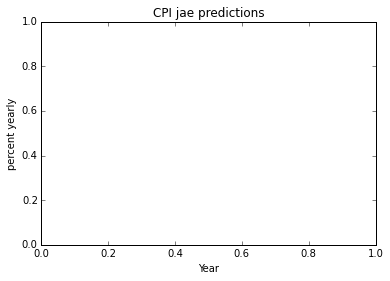

In [6]:
plt.figure('All jae predictions')
plt.title('CPI jae predictions')
plt.ylabel('percent yearly')
plt.xlabel('Year')
jae_columns = []
for col in data.raw_data.columns:
    if ('xe' in col) or ('jae' in col):
        jae_columns.append(col)
        if 'CPI-jae' in col:
            linestyle ='b-' 
        else : 
            linestyle = '--'
        plt.plot(data.raw_data.index,
                 data.raw_data[col], linestyle,
                 label=col)

print jae_columns
jae_columns.remove('CPI-jae')


cpi_columns = []
plt.figure('CPI predictions')
plt.title('CPI predictions')
plt.ylabel('percent yearly')
plt.xlabel('Year')
#plt.grid(True)
plt.plot(data.raw_data.index,
         data.raw_data['CPI'],)
         #label ='CPI'
         
print 'columns', data.raw_data.columns
for column_name in data.raw_data.columns:
    #print'col is', cpi
    if ('cpi' in column_name):
        #print 'Found cpi in column:', cpi
        cpi_columns.append(column_name)
        plt.plot(data.raw_data.index,
                 data.raw_data[column_name],'--')
                 #label=column_name)
#plt.legend()        
print 'List of cpi columns:', cpi_columns
    
#for col in data.raw_data.columns:
 #   print col


In [7]:
#How to find the vector of predictions one quarter ahead
for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            # This is a start, but def not correct
            # Maybe because the jae columns are not sorted correctly?
            data.raw_data.loc[t, 'firstpred'] = value
            data.raw_data.loc[t, 'firstpred_']
        break # stop the loop on the first valid prediction
        
print data.raw_data.firstpred
plt.figure('First prediction')
plt.plot(data.raw_data.index,
        data.raw_data['CPI-jae'])

NameError: name 'data' is not defined

In [6]:
# How to find the vector of predictions one quarter ahead

for t in data.raw_data.index:
    for col in jae_columns:
        value = data.raw_data.loc[t,col]
        if not math.isnan(value):
            data.raw_data.loc[t,'firstpred'] = value
            data.raw_data.loc[t,'firstpred_src'] = col
            # Do not stop the loop on the first column, but rather
            # use the last column with a valid number.
            # We have to think a bit on how to get the other predictions
            # with longer horizons, should probably make a list of these.
            # An option is to work on the reverse list of columns, and add 
            # with longer prediction horizons..
            
plt.figure('First prediction',figsize=(10,8))
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae'],
         label='CPI-jae')
plt.plot(data.raw_data.index,
         data.raw_data.firstpred,
         label='First prediction')
plt.plot(data.raw_data.index,
         data.raw_data['CPI-jae']-data.raw_data.firstpred,
         label='First prediction error')
plt.legend()
plt.grid(True)
# Print the plotted data, so it can be verified towards
# the excel source data.
#print data.raw_data.loc[:,['firstpred','firstpred_src']]

# Regn ut square errors på den lista her.

NameError: name 'data' is not defined

In [8]:
#Regular Expression tools to decode column names

import re
import numpy as np

__ppr_name_regexp = re.compile(
    (r'PPR'                  # Start with PPR
     r'(?P<quarter>\d)'      # Look for single digit quarter
     r'_'                    # seperated by an underscore
     r'(?P<year>\d\d)'       # followed by two-digit year
     r'(?P<description>.*)'  # and the description tag.
     ))
""" The regular expression for this tool. We do not want others outside to use
this regular expression. So we make it private by starting the name with __.
"""


def decode(column_name):
    """ Internal method for InflaData to get year, quarter and description
        from the column names in the input dataset.
    """
    match = __ppr_name_regexp.match(column_name)
    if not match:
        return None
    dictionary = match.groupdict()
    return dictionary

In [9]:
example = decode('PPR1_11jae')
print example
print example['year']
print example['quarter']

{'quarter': '1', 'description': 'jae', 'year': '11'}
11
1


In [10]:
# Move decode column name to a module 
column_name = 'PPR3_11jae'
decode_example = decode_column_name.decode(column_name)
print column_name, 'gets decoded to: ', decode_example

PPR3_11jae gets decoded to:  {'quarter': '3', 'description': 'jae', 'year': '11'}


In [11]:
#Selecting the CPI-jae columns from the rawdata
# Since we already have a list of the interesting columns, this is _easy_.

cpi_jae_data = data.raw_data.loc[:, jae_columns]
print cpi_jae_data; #prints the dataset with columns containing jae or xe


NameError: name 'data' is not defined

In [12]:
# Test datetime

print 'Trygve er:', np.datetime64('2015') - np.datetime64('1985')
today = np.datetime64('2015-09-04')
trygve = np.datetime64('1985-08-07')
camilla = np.datetime64('1987-11-09')
print 'Trygve er:', today - trygve
print 'Camilla er:', today - camilla
print 'Trygve er', camilla - trygve, 'eldre enn Camilla.'
dt = pd.Timedelta(camilla-trygve)
dt_quarters = int(round(dt.days / (365.2425 / 4)))
print 'Trygve er', dt_quarters, 'quarters eldre enn Camilla.'
print 'Pandas index er: ', data.raw_data.index.dtype
print 'Trygve er: ', np.datetime64('2015') - np.datetime64('1985')
print 'Camilla er:', np.datetime64('2015') - np.datetime64('1987')
print 'Camilla er ikke 28 år men 27. Vil ha svar i år'
print 'Camilla er', np.datetime64('2015-09','Y') - np.datetime64('1987-11','Y') 
dt_years = int(round(dt.days / (365.2425 / 1)))
print 'Trygve er ', dt_years, 'years eldre enn Camilla'
print dt_years(today - camilla)
print data.raw_data.index.dtype



Trygve er: 30 years
Trygve er: 10985 days
Camilla er: 10161 days
Trygve er 824 days eldre enn Camilla.
Trygve er 9 quarters eldre enn Camilla.
Pandas index er: 

NameError: name 'data' is not defined

In [13]:
from inflastudy import time_tools
trygve = np.datetime64('1985-08-07')
camilla = np.datetime64('1987-11-09')
dt = time_tools.time_diff_in_quarters(trygve, camilla)
print 'Trygve er', dt, 'quarters eldre enn Camilla.'

 Trygve er 9 quarters eldre enn Camilla.


NameError: name 'data' is not defined

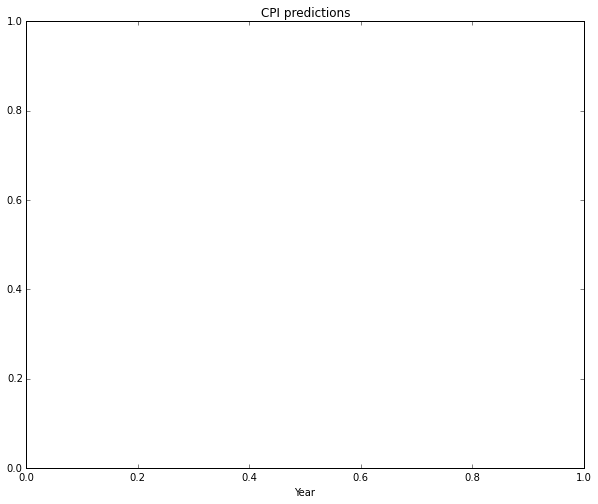

In [14]:
# Plot all CPI predictions and the actual CPI.

plt.figure('CPI predictions', figsize=(10,8))  # Larger plot.
plt.title('CPI predictions')
plt.xlabel('Year')
# Plot the actual CPI as a solid line.
plt.plot(data.raw_data.index,
         data.raw_data['CPI'],
         label ='CPI')

for col_name in data.cpi_predictions:
    plt.plot(data.cpi_predictions.index,
             data.cpi_predictions[col_name],
             '--',
             label = 'col_name')
data.cpi_predictions.plot(legend=False, style='--')